In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
data = pd.read_csv('C:/Users/ABA/Desktop/nikamooz/mainCourseSTuuf/dataset/wdbc.csv')
train = data[0:480]
test = data [480:]
print(train.info())
target = data['Class']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 31 columns):
V1       480 non-null float64
V2       480 non-null float64
V3       480 non-null float64
V4       480 non-null float64
V5       480 non-null float64
V6       480 non-null float64
V7       480 non-null float64
V8       480 non-null float64
V9       480 non-null float64
V10      480 non-null float64
V11      480 non-null float64
V12      480 non-null float64
V13      480 non-null float64
V14      480 non-null float64
V15      480 non-null float64
V16      480 non-null float64
V17      480 non-null float64
V18      480 non-null float64
V19      480 non-null float64
V20      480 non-null float64
V21      480 non-null float64
V22      480 non-null float64
V23      480 non-null float64
V24      480 non-null float64
V25      480 non-null float64
V26      480 non-null float64
V27      480 non-null float64
V28      480 non-null float64
V29      480 non-null float64
V30      480 non-null flo

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,2
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,2
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,2
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,2
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,2
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,2
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,2
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,2
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,2
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,2


In [17]:
corrmat = train.corr()
sorted_corrs = corrmat['Class'].abs().sort_values()
sorted_corrs

V12      0.001781
V19      0.006090
V10      0.014752
V15      0.038178
V20      0.078200
V17      0.235677
V16      0.287362
V9       0.322952
V30      0.345836
V5       0.403368
V18      0.407528
V29      0.418494
V2       0.452972
V25      0.474667
V22      0.486076
V14      0.527578
V13      0.540457
V11      0.551389
V26      0.596155
V6       0.611408
V27      0.655747
V7       0.684939
V4       0.699856
V24      0.724952
V1       0.726790
V3       0.739572
V21      0.774405
V8       0.775070
V23      0.780390
V28      0.799436
Class    1.000000
Name: Class, dtype: float64

## HeatMap SeaBorn

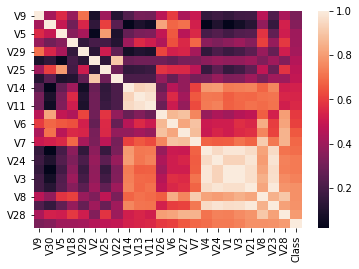

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train[strong_corrs.index].corr()
sns.heatmap(corrmat)

In [5]:
strong_corrs

V9       0.322952
V30      0.345836
V5       0.403368
V18      0.407528
V29      0.418494
V2       0.452972
V25      0.474667
V22      0.486076
V14      0.527578
V13      0.540457
V11      0.551389
V26      0.596155
V6       0.611408
V27      0.655747
V7       0.684939
V4       0.699856
V24      0.724952
V1       0.726790
V3       0.739572
V21      0.774405
V8       0.775070
V23      0.780390
V28      0.799436
Class    1.000000
Name: Class, dtype: float64

In [6]:
final_corr_cols = strong_corrs.drop(columns=['V19','V12','V10','V15','V20','V17','V16','V30','V5','V18','V2','V29','V25','V22'],axis=1)

## Check Missing Value in test Set

In [18]:
print(test[final_corr_cols.index].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 480 to 568
Data columns (total 24 columns):
V9       89 non-null float64
V30      89 non-null float64
V5       89 non-null float64
V18      89 non-null float64
V29      89 non-null float64
V2       89 non-null float64
V25      89 non-null float64
V22      89 non-null float64
V14      89 non-null float64
V13      89 non-null float64
V11      89 non-null float64
V26      89 non-null float64
V6       89 non-null float64
V27      89 non-null float64
V7       89 non-null float64
V4       89 non-null float64
V24      89 non-null float64
V1       89 non-null float64
V3       89 non-null float64
V21      89 non-null float64
V8       89 non-null float64
V23      89 non-null float64
V28      89 non-null float64
Class    89 non-null int64
dtypes: float64(23), int64(1)
memory usage: 16.8 KB
None


## ساخت مدل با تمامی خصیصه های انتخابی

In [8]:
features = final_corr_cols.drop(['Class']).index
target = 'Class'

# پاکسازی مقادیر NAN
clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['Class'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)


0.23465767097664814
0.2374298403803745


## ساخت مدل با تمامی خصیصه ها

In [22]:
features = sorted_corrs.drop(['Class']).index
target = 'Class'

# پاکسازی مقادیر NAN
clean_test = test[sorted_corrs.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['Class'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

0.22985886953086182
0.23654239008917408


##  تمرین : روی داده قبلی اجرا کنید

## Variance & Normalization

In [9]:
tempTrain = (train[features] - train[features].min())/(train[features].max() - train[features].min())
print(tempTrain.min())
print(tempTrain.max())

sorted_values = tempTrain.var().sort_values()
sorted_values

V9     0.0
V30    0.0
V5     0.0
V18    0.0
V29    0.0
V2     0.0
V25    0.0
V22    0.0
V14    0.0
V13    0.0
V11    0.0
V26    0.0
V6     0.0
V27    0.0
V7     0.0
V4     0.0
V24    0.0
V1     0.0
V3     0.0
V21    0.0
V8     0.0
V23    0.0
V28    0.0
dtype: float64
V9     1.0
V30    1.0
V5     1.0
V18    1.0
V29    1.0
V2     1.0
V25    1.0
V22    1.0
V14    1.0
V13    1.0
V11    1.0
V26    1.0
V6     1.0
V27    1.0
V7     1.0
V4     1.0
V24    1.0
V1     1.0
V3     1.0
V21    1.0
V8     1.0
V23    1.0
V28    1.0
dtype: float64


V14    0.007822
V13    0.009581
V11    0.010658
V18    0.013962
V30    0.014419
V29    0.015670
V24    0.020112
V2     0.020154
V9     0.022083
V4     0.022337
V25    0.022795
V26    0.024439
V22    0.026474
V6     0.027054
V1     0.027501
V5     0.027760
V3     0.027918
V23    0.028090
V27    0.028404
V21    0.029776
V7     0.035875
V8     0.037846
V28    0.052227
dtype: float64

## حدف فیچر با واریانس پایین

In [10]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop(['V14','V13'])

lr = LinearRegression()
lr.fit(train[features], train['Class'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

0.23487086537057
0.23864424516377658
